# Spark Funds Investment Analysis

## Problem statement

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Business objective

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

## Business and Data Understanding

Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

## Data understanding and preparation

In [1]:
#Importing Requiried libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

## Checkpoint 1: Data Cleaning 1

In [2]:
#importing companies data set

companies = pd.read_csv('companies.csv', encoding = 'ISO8859-2')
companies.head()
#for more encoding standards use this link - https://encoding.spec.whatwg.org/
# data set can also be imported in below format without unsing encoding 
#companies = pd.read_csv('companies.csv', engine = 'python')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#importing rounds2 data set

rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO8859-2')
rounds2.head()

#for more encoding standards use this link - https://encoding.spec.whatwg.org/
# data set can also be imported in below format without unsing encoding 
#companies = pd.read_csv('companies.csv', engine = 'python')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


### 1. How many unique companies are present in rounds2?

**Steps**<br>
Identifing a unique variable column (primary key) which is unique for each row.<br>
slecting the column which dont have null values.<br>
Use nunique()

In [5]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [6]:
#converting the company_permalink column to lower case
rounds2.company_permalink = rounds2.company_permalink.str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
rounds2.company_permalink.nunique()

66370

### 2. How many unique companies are present in the companies file?
The approach for this question is samle as above process

In [8]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [9]:
companies.permalink = companies.permalink.str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
companies.permalink.nunique()

66368

### 4. Are there any companies in the rounds2 file which are not present in companies?

Using set.difference method we can find whether the companies in rounda2 are present in companis table

In [11]:
a = set(rounds2.company_permalink).difference(set(companies.permalink))
a

{'/organization/e-că\x8abica',
 '/organization/energystone-games-ç\x81ľç\x9fłć¸¸ć\x88\x8f',
 '/organization/huizuche-com-ć\x83\xa0ç§˙č˝ś',
 '/organization/magnet-tech-çł\x81ç\x9fłç§\x91ć\x8a\x80',
 '/organization/tipcat-interactive-ć˛\x99č\x88˙äżąć\x81żç§\x91ć\x9a\x80',
 '/organization/weiche-tech-ĺ\x96\x82č˝śç§\x91ć\x8a\x80',
 '/organization/zengame-çś\x85ć¸¸ç§\x91ć\x8a\x80'}

In [12]:
b = set(companies.permalink).difference(set(rounds2.company_permalink))
b

{'/organization/e-că\x9abica',
 '/organization/energystone-games-ç\x81ľç˙łć¸¸ć\x88\x8f',
 '/organization/huizuche-com-ć\x83\xa0ç§\x9fč˝ś',
 '/organization/tipcat-interactive-ć˛\x99č\x88\x9fäżąć\x81żç§\x91ć\x9a\x80',
 '/organization/zengame-çś\x85ć¸¸ç§\x91ć\x9a\x80'}

In [13]:
a.difference(b)

{'/organization/e-că\x8abica',
 '/organization/energystone-games-ç\x81ľç\x9fłć¸¸ć\x88\x8f',
 '/organization/huizuche-com-ć\x83\xa0ç§˙č˝ś',
 '/organization/magnet-tech-çł\x81ç\x9fłç§\x91ć\x8a\x80',
 '/organization/tipcat-interactive-ć˛\x99č\x88˙äżąć\x81żç§\x91ć\x9a\x80',
 '/organization/weiche-tech-ĺ\x96\x82č˝śç§\x91ć\x8a\x80',
 '/organization/zengame-çś\x85ć¸¸ç§\x91ć\x8a\x80'}

Yes there are seven companies which are not present in companies table.

### 5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.

we have one table with the the companies and their country, second table has companies details with the invest type and raised amount. Any type of join can be used to add all variables(columns) from companies table to rounds2 table. lets see how data is going to map by using different types of joints.

In [14]:
#right join
master_frame = pd.merge(companies , rounds2 , left_on = 'permalink', right_on = 'company_permalink',how = 'right')
print('Rows = ',master_frame.size)
print('Below are the companies which are present in rounds2 but not in companies')
set(rounds2.company_permalink).difference(set(companies.permalink))


Rows =  1839184
Below are the companies which are present in rounds2 but not in companies


{'/organization/e-că\x8abica',
 '/organization/energystone-games-ç\x81ľç\x9fłć¸¸ć\x88\x8f',
 '/organization/huizuche-com-ć\x83\xa0ç§˙č˝ś',
 '/organization/magnet-tech-çł\x81ç\x9fłç§\x91ć\x8a\x80',
 '/organization/tipcat-interactive-ć˛\x99č\x88˙äżąć\x81żç§\x91ć\x9a\x80',
 '/organization/weiche-tech-ĺ\x96\x82č˝śç§\x91ć\x8a\x80',
 '/organization/zengame-çś\x85ć¸¸ç§\x91ć\x8a\x80'}

To get the data which are common in both the tables inner join can be used. using this method null value count can be reduced. so lets use inner join to create master_frame

In [15]:
master_frame = pd.merge(companies , rounds2 , left_on = 'permalink', right_on = 'company_permalink',how = 'inner')
master_frame.head()
#All the columns are adde to rouds2 table

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### How many observations are present in master_frame ?

In [16]:
master_frame.shape[0]

114942

### Cleaning Master_frame dataframe

**STEPS**<br>
1. Removing redundant columns
2. Handling Null values

In [17]:
#columns
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

**Removing the columns which are not helpfull for busineess objective or type of analysis** 

In [18]:
redundant_Columns = ['name','homepage_url','state_code','region','city','founded_at','status','company_permalink','funding_round_permalink','funding_round_code','funded_at']

In [19]:
#dropping columns which are not requiried
master_frame = master_frame.drop(columns = redundant_Columns)
master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.0


### Handling duplicates

In [20]:
#number rows duplicated
master_frame.duplicated().sum()

2715

In [21]:
master_frame = master_frame.drop_duplicates()
master_frame.duplicated().sum()

0

In [22]:
master_frame.shape

(112227, 5)

#### Handling Null values

In [23]:
#Percentage of null values for each column
round(master_frame.isnull().mean()*100,2)

permalink              0.00
category_list          2.93
country_code           7.55
funding_round_type     0.00
raised_amount_usd     16.56
dtype: float64

From the above data it shows there are null values in three columns. so lets drop the rows which have all the three columns as null values

In [24]:
# number of rows which have all the three columns as null values
len(master_frame[master_frame.isnull().sum(axis = 1) == 3])

1152

In [25]:
#percentage of rows which have all the three columns as null values
round(len(master_frame[master_frame.isnull().sum(axis = 1) == 3])/len(master_frame)*100)

1

In [26]:
#As percentage is very less we can remove those rows
master_frame = master_frame[master_frame.isnull().sum(axis = 1) < 3]
master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.0


In [27]:
#Percentage of null values for each column
round(master_frame.isnull().mean()*100,2)

permalink              0.00
category_list          1.93
country_code           6.59
funding_round_type     0.00
raised_amount_usd     15.69
dtype: float64

**CLEANING COUNTRY_CODE COLUMN** 

As it is the categorial variable lets look at unique counties and there percentage value

In [28]:
master_frame.country_code = master_frame.country_code.str.upper()
round(master_frame.country_code.value_counts(normalize = True, dropna = True,)*100,2)

USA    68.01
GBR     5.67
CAN     2.95
CHN     2.44
IND     2.11
       ...  
SEN     0.00
KNA     0.00
DMA     0.00
DZA     0.00
BRN     0.00
Name: country_code, Length: 137, dtype: float64

So there are 68% of companies from USA. Spark funds is intrested in Top countries and sector. As objective is not specific abount company so we can replace null values in country code column with the USA 

In [29]:
master_frame.country_code = master_frame.country_code.fillna(master_frame.country_code.mode()[0])

In [30]:
#Percentage of null values for each column
round(master_frame.isnull().mean()*100,2)

permalink              0.00
category_list          1.93
country_code           0.00
funding_round_type     0.00
raised_amount_usd     15.69
dtype: float64

### Cleaning raised_amount_usd

Lets look at how the values are distributes in **raised_amount_usd** column<br>
As the percentage of missing values for **raised_amount_usd** column is more (around 17%) it is better to remove them from the dataset. If the missing values are imputed with any other values then the result may be baised. 

<AxesSubplot:ylabel='raised_amount_usd'>

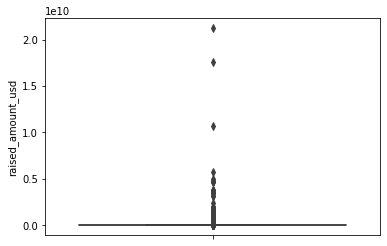

In [31]:
#creating the boxplot to see distibution of values
sns.boxplot(data = master_frame , y = 'raised_amount_usd')

In [32]:
master_frame = master_frame[master_frame.raised_amount_usd.notna()]
master_frame.shape

(93647, 5)

In [33]:
#Percentage of null values for each column
round(master_frame.isnull().mean()*100,2)

permalink             0.00
category_list         1.11
country_code          0.00
funding_round_type    0.00
raised_amount_usd     0.00
dtype: float64

Converting the **raised_amount_usd** to million dollars which makes it easy to read

### Cleaning category_list


In [34]:
master_frame.category_list.value_counts()

Biotechnology                                                                          7692
Software                                                                               5772
Health Care                                                                            2038
Clean Technology                                                                       1889
Mobile                                                                                 1814
                                                                                       ... 
Consumer Electronics|E-Commerce|Retail                                                    1
Consumer Goods|Health Care                                                                1
Curated Web|Local|Local Search|Network Security|Online Scheduling|Service Providers       1
B2B|Construction|Interior Design|Marketplaces|Search                                      1
Consulting|Services|Software|Technology                                         

As each category count is almost similar so it is not a good idea imputing the null values with mode. so drop the rows with have null values

In [35]:
master_frame = master_frame[master_frame.category_list.notna()]

In [36]:
#Percentage of null values for each column
round(master_frame.isnull().mean()*100,2)

permalink             0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

## Checkpoint 2: Funding Type Analysis

**Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)**

In [37]:
#filtering master_frame as per the above constrain
funding_type = ['venture', 'angel', 'seed','private equity']
Shrt = master_frame.funding_round_type


In [38]:
master_frame = master_frame[(Shrt == 'venture') | (Shrt == 'angel') | (Shrt == 'private_equity')| (Shrt == 'seed')]
master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.0
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,USA,venture,3406878.0
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.0
7,/organization/0ndine-biomedical-inc,Biotechnology,CAN,seed,43360.0


### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

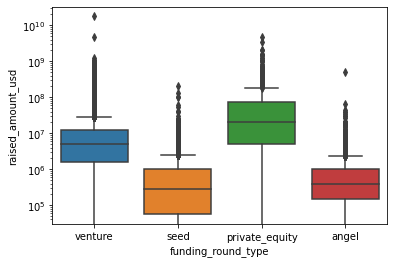

In [39]:
#lets look at how the raised_amount_usd are distributed based on sector wise
sns.boxplot(data = master_frame , x = 'funding_round_type' , y = 'raised_amount_usd')
plt.yscale('log')

In [40]:
#as the data contains outliers median will be the best representative amount for each type of investment
#creating a pivot table
plot1_data = master_frame.pivot_table(index = 'funding_round_type', values = 'raised_amount_usd', aggfunc = np.median)
plot1_data = plot1_data.reset_index(drop = False)
plot1_data

,funding_round_type,raised_amount_usd
0,angel,400000.0
1,private_equity,20000000.0
2,seed,280000.0
3,venture,5000000.0


**Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.**

By seeing the results from above pivot table venture type funding will be suitable for spark funds.

## Checkpoint 3: Country Analysis
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.<br>

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)<br>

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

Creating a pivot table which contains top 9 countries for venture type investment

In [41]:
#creating pivot table segmented on country_code
table = master_frame[master_frame.funding_round_type == 'venture'].pivot_table(index = 'country_code',values = 'raised_amount_usd',aggfunc = np.sum)

In [42]:
top9 = table.sort_values(by = 'raised_amount_usd',ascending = False).iloc[0:9].reset_index()
top9

,country_code,raised_amount_usd
0,USA,4.330938e+11
1,CHN,3.836198e+10
2,GBR,1.993187e+10
3,IND,1.413401e+10
4,CAN,9.364474e+09
5,FRA,7.222851e+09
6,ISR,6.698556e+09
7,DEU,6.286922e+09
8,JPN,3.137247e+09


**Identify the top three English-speaking countries in the data frame top9.**

**1. USA**<br>
**2. GBR**<br>
**3. IND**<br>
Note CHN is not a english speaking country

## Checkpoint 4: Sector Analysis 1

In [43]:
#Importing mapping file to create primary sector column in master_frame
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [44]:
master_frame.category_list

0                                                     Media
2         Application Platforms|Real Time|Social Network...
3                                         Apps|Games|Mobile
4                                               Curated Web
7                                             Biotechnology
                                ...                        
114934                                  Enterprise Software
114935          Advertising|Mobile|Web Development|Wireless
114936          Advertising|Mobile|Web Development|Wireless
114938          Advertising|Mobile|Web Development|Wireless
114940    Consumer Electronics|Internet of Things|Teleco...
Name: category_list, Length: 78644, dtype: object

For some rows in category_list colum have multiple value. so as per the business rule lets consider the firt element in that list

In [45]:
master_frame.category_list = master_frame.category_list.str.lower()
master_frame.category_list = master_frame.category_list.apply(lambda x : x.split('|')[0])

In [46]:
master_frame

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,media,IND,venture,10000000.0
2,/organization/-qounter,application platforms,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,apps,USA,venture,3406878.0
4,/organization/0-6-com,curated web,CHN,venture,2000000.0
7,/organization/0ndine-biomedical-inc,biotechnology,CAN,seed,43360.0
...,...,...,...,...,...
114934,/organization/zznode-science-and-technology-co...,enterprise software,CHN,venture,1587301.0
114935,/organization/zzzzapp-com,advertising,HRV,seed,7000.0
114936,/organization/zzzzapp-com,advertising,HRV,seed,33149.0
114938,/organization/zzzzapp-com,advertising,HRV,seed,32842.0


In [47]:
#converting mapping file from wide format to long format
val_vars = list(mapping.columns[1:])
mapping = mapping.melt(id_vars = ['category_list'],value_vars = val_vars)

In [48]:
mapping = mapping[mapping.value == 1]
mapping = mapping.drop('value',axis = 1)
mapping = mapping.rename(columns={'variable': 'main_sector'})

In [49]:
mapping = mapping.reset_index(drop = True)
mapping.category_list = mapping.category_list.str.lower()
mapping

,category_list,main_sector
0,adventure travel,Automotive & Sports
1,aerospace,Automotive & Sports
2,auto,Automotive & Sports
3,automated kiosk,Automotive & Sports
4,automotive,Automotive & Sports
...,...,...
683,social recruiting,"Social, Finance, Analytics, Advertising"
684,social television,"Social, Finance, Analytics, Advertising"
685,social travel,"Social, Finance, Analytics, Advertising"
686,stock exchanges,"Social, Finance, Analytics, Advertising"


**After merging master_frame and mapping tables i have found 7% of null values in main_sector coulmn.<br>**
**After comparing catogory_list column in both tables i have seen below error<br>**
**Few values of catagory_list in mapping table na is replcaced with 0.<br>**
**Below items are the values with the above error**

 
{'0notechnology',
 '0tural language processing',
 '0tural resources',
 '0vigation',
 'a0lytics',
 'alter0tive medicine',
 'big data a0lytics',
 'business a0lytics',
 'can0bis',
 'career ma0gement',
 'chi0 internet',
 'cloud ma0gement',
 'contact ma0gement',
 'digital rights ma0gement',
 'digital sig0ge',
 'document ma0gement',
 'educatio0l games',
 'energy ma0gement',
 'energy storage',
 'event ma0gement',
 'fi0nce',
 'fi0nce technology',
 'fi0ncial exchanges',
 'fi0ncial services',
 'film distribution',
 'fleet ma0gement',
 'flowers',
 'fmcg',
 'gover0nce',
 'identity ma0gement',
 'innovation ma0gement',
 'intellectual asset ma0gement',
 'investment ma0gement',
 'it ma0gement',
 'jour0lism',
 'knowledge ma0gement',
 'lead ma0gement',
 'lotteries',
 'low bid auctions',
 'medical professio0ls',
 'mobile a0lytics',
 'multi-level marketing',
 nan,
 'performance marketing',
 'perso0l branding',
 'perso0l data',
 'perso0l fi0nce',
 'perso0l health',
 'perso0lization',
 'pervasive computing',
 'plumbers',
 'predictive a0lytics',
 'professio0l networking',
 'professio0l services',
 'project ma0gement',
 'promotio0l',
 'property ma0gement',
 'renewable tech',
 'risk ma0gement',
 'social business',
 'social media ma0gement',
 'social recruiting',
 'supply chain ma0gement',
 'task ma0gement',
 'veteri0ry',
 'virtual workforces',
 'waste ma0gement'}

In [50]:
#replace 0 with na 
mapping.category_list = mapping.category_list.str.replace('0','na')
mapping.sample(10)

,category_list,main_sector
581,coupons,"Social, Finance, Analytics, Advertising"
126,leisure,Entertainment
407,interest graph,Others
450,online education,Others
165,active lifestyle,Health
392,homeland security,Others
12,electric vehicles,Automotive & Sports
67,renewable tech,Cleantech / Semiconductors
636,insurance,"Social, Finance, Analytics, Advertising"
48,fertility,Cleantech / Semiconductors


Now lets merge master_frame and mapping on column category_list

In [51]:
master_frame = pd.merge(master_frame,mapping,on = 'category_list',how = 'left')
master_frame.sample(10)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
28637,/organization/greyson-international,biotechnology,USA,seed,115000.0,Cleantech / Semiconductors
33433,/organization/intellipharmaceutics-international,biotechnology,CAN,venture,12000000.0,Cleantech / Semiconductors
7740,/organization/berkeley-design-automation,nanotechnology,USA,venture,6000000.0,Cleantech / Semiconductors
72104,/organization/validic,apps,USA,seed,78500.0,"News, Search and Messaging"
73231,/organization/viewpoints,reviews and recommendations,USA,venture,5000000.0,Entertainment
56923,/organization/reshape-medical,health care,USA,venture,38000000.0,Health
50211,/organization/parsagen-diagnostics,health and wellness,USA,venture,3456000.0,Health
77273,/organization/yongche,e-commerce,CHN,private_equity,700000000.0,Others
12565,/organization/centice,biotechnology,USA,venture,11300000.0,Cleantech / Semiconductors
23357,/organization/exploramed,health care,USA,venture,15000000.0,Health


In [52]:
#looking for percentage of null values after merging
round(master_frame.isnull().mean()*100,2)

permalink             0.00
category_list         0.00
country_code          0.00
funding_round_type    0.00
raised_amount_usd     0.00
main_sector           0.08
dtype: float64

In [53]:
master_frame.shape

(78644, 6)

## Checkpoint 5: Sector Analysis 2

In [54]:
#as the range of funding preferred by Spark Funds is 5 to 15 million USD.
master_frame = master_frame[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
master_frame.shape

(16744, 6)

In [55]:
#data frame for country USA , Investment type = Venture
D1 = master_frame[(master_frame.country_code == 'USA') & (master_frame.funding_round_type == 'venture')]
D1.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
9,/organization/0xdata,analytics,USA,venture,8900000.0,"Social, Finance, Analytics, Advertising"
14,/organization/1-mainstream,apps,USA,venture,5000000.0,"News, Search and Messaging"
59,/organization/123greetings,internet,USA,venture,5400000.0,"News, Search and Messaging"
61,/organization/128-technology,service providers,USA,venture,11999347.0,Others
67,/organization/1366-technologies,manufacturing,USA,venture,15000000.0,Manufacturing


In [56]:
#data frame for country GBR , Investment type = Venture
D2 = master_frame[(master_frame.country_code == 'GBR') & (master_frame.funding_round_type == 'venture')]
D2.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
252,/organization/365scores,android,GBR,venture,5500000.0,"Social, Finance, Analytics, Advertising"
547,/organization/7digital,content creators,GBR,venture,8468328.0,Entertainment
548,/organization/7digital,content creators,GBR,venture,10000000.0,Entertainment
599,/organization/90min,media,GBR,venture,15000000.0,Entertainment
600,/organization/90min,media,GBR,venture,5800000.0,Entertainment


In [57]:
#data frame for country IND , Investment type = Venture
D3 = master_frame[(master_frame.country_code == 'IND') & (master_frame.funding_round_type == 'venture')]
D3.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,media,IND,venture,10000000.0,Entertainment
146,/organization/21diamonds-india,e-commerce,IND,venture,6369507.0,Others
666,/organization/a-little-world,finance,IND,venture,6410000.0,"Social, Finance, Analytics, Advertising"
1696,/organization/adlabs-imagica,entertainment,IND,venture,8180000.0,Entertainment
2331,/organization/agile,finance,IND,venture,5740000.0,"Social, Finance, Analytics, Advertising"


In [58]:
CON_DF = {'USA' : D1 , 'GBR' : D2 , 'IND' : D3}

**1. Total number of Investments (count)**

In [59]:
for key , value in CON_DF.items():
    print('Total number of Investments in {} is {}'.format(key,len(value)))

Total number of Investments in USA is 12400
Total number of Investments in GBR is 617
Total number of Investments in IND is 324


**2. Total amount of investment (USD)**

In [60]:
for key , value in CON_DF.items():
    print('Total amount of Investments(USD) in {} is {}'.format(key,value.raised_amount_usd.sum()))

Total amount of Investments(USD) in USA is 110610258204.0
Total amount of Investments(USD) in GBR is 5337078691.0
Total amount of Investments(USD) in IND is 2907043602.0


**3. Top Sector name (no. of investment-wise)**

In [61]:
#Top Sector for USA
D1.pivot_table(index = 'main_sector',values = 'raised_amount_usd',aggfunc = 'count').sort_values(by = 'raised_amount_usd',ascending = False)


,raised_amount_usd
main_sector,
Others,3018
"Social, Finance, Analytics, Advertising",2763
Cleantech / Semiconductors,2384
"News, Search and Messaging",1645
Health,949
Manufacturing,835
Entertainment,624
Automotive & Sports,181


In [62]:
#Top Sector for GBR
D2.pivot_table(index = 'main_sector',values = 'raised_amount_usd',aggfunc = 'count').sort_values(by = 'raised_amount_usd',ascending = False)


,raised_amount_usd
main_sector,
Others,145
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130
"News, Search and Messaging",71
Entertainment,56
Manufacturing,42
Health,24
Automotive & Sports,16


In [63]:
#Top Sector for IND
D3.pivot_table(index = 'main_sector',values = 'raised_amount_usd',aggfunc = 'count').sort_values(by = 'raised_amount_usd',ascending = False)

,raised_amount_usd
main_sector,
Others,110
"Social, Finance, Analytics, Advertising",58
"News, Search and Messaging",52
Entertainment,32
Manufacturing,21
Cleantech / Semiconductors,19
Health,19
Automotive & Sports,13


In [64]:
#Top 3 companis of USA in sector Others
D1[D1.main_sector == 'Others'].sort_values(by = 'raised_amount_usd',ascending = False).head(3)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
39247,/organization/loopt,location based services,USA,venture,15000000.0,Others
20881,/organization/edmodo,all students,USA,venture,15000000.0,Others
10418,/organization/broadcast-international,software,USA,venture,15000000.0,Others


In [65]:
#Top 3 companis in GBR in sector Others
D2[D2.main_sector == 'Others'].sort_values(by = 'raised_amount_usd',ascending = False).head(3)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
22196,/organization/environmentiq,software,GBR,venture,15000000.0,Others
70189,/organization/tribold,software,GBR,venture,15000000.0,Others
59993,/organization/sensage,security,GBR,venture,15000000.0,Others


In [66]:
#Top 3 companis in IND in sector Others
D3[D3.main_sector == 'Others'].sort_values(by = 'raised_amount_usd',ascending = False).head(3)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
38319,/organization/limeroad,e-commerce,IND,venture,15000000.0,Others
13836,/organization/classteacher-learning-systems,edtech,IND,venture,15000000.0,Others
74303,/organization/voylla-retail-pvt-ltd,e-commerce,IND,venture,15000000.0,Others


In [67]:
#Top 3 companis in USA in sector Social, Finance, Analytics, Advertising
D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd',ascending = False).head(3)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
71059,/organization/twitter,information services,USA,venture,15000000.0,"Social, Finance, Analytics, Advertising"
19911,/organization/driftt,business services,USA,venture,15000000.0,"Social, Finance, Analytics, Advertising"
19471,/organization/docker,development platforms,USA,venture,15000000.0,"Social, Finance, Analytics, Advertising"


In [68]:
#Top 3 companis in GBR in sector Social, Finance, Analytics, Advertising
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd',ascending = False).head(3)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
61441,/organization/similarweb,advertising,GBR,venture,15000000.0,"Social, Finance, Analytics, Advertising"
78432,/organization/zopa,finance,GBR,venture,15000000.0,"Social, Finance, Analytics, Advertising"
44776,/organization/mythings,accounting,GBR,venture,15000000.0,"Social, Finance, Analytics, Advertising"


In [69]:
#Top 3 companis in IND in sector Social, Finance, Analytics, Advertising
D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd',ascending = False).head(3)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
24405,/organization/financial-information-network-op...,finance,IND,venture,15000000.0,"Social, Finance, Analytics, Advertising"
60849,/organization/shopclues-com,consumer internet,IND,venture,15000000.0,"Social, Finance, Analytics, Advertising"
40338,/organization/manthan-systems,analytics,IND,venture,15000000.0,"Social, Finance, Analytics, Advertising"


## Checkpoint 6: Plots

**1. A plot showing the representative amount of investment in each funding type.**  

In [70]:
#lets create a pivot table
plot_1= pd.pivot_table(data = master_frame,index = 'funding_round_type',values = 'raised_amount_usd',aggfunc = np.median)
plot_1

,raised_amount_usd
funding_round_type,
angel,6500000.0
private_equity,9473556.0
seed,5993969.5
venture,8250000.0


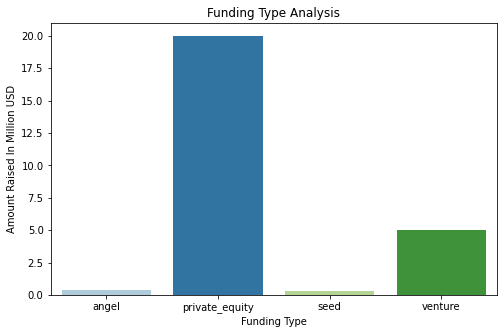

In [71]:
plt.figure(figsize = [8,5])
plot1_data.raised_amount_usd = plot1_data.raised_amount_usd/1000000
sns.barplot(data = plot1_data, x = 'funding_round_type', y = 'raised_amount_usd', estimator = np.median,palette = 'Paired')
plt.xlabel("Funding Type")
plt.ylabel('Amount Raised In Million USD')
plt.title('Funding Type Analysis')
plt.savefig('Funding Type Analysis')
plt.show()


In [72]:
#top9.raised_amount_usd = top9.raised_amount_usd/1000000
top9

,country_code,raised_amount_usd
0,USA,4.330938e+11
1,CHN,3.836198e+10
2,GBR,1.993187e+10
3,IND,1.413401e+10
4,CAN,9.364474e+09
5,FRA,7.222851e+09
6,ISR,6.698556e+09
7,DEU,6.286922e+09
8,JPN,3.137247e+09


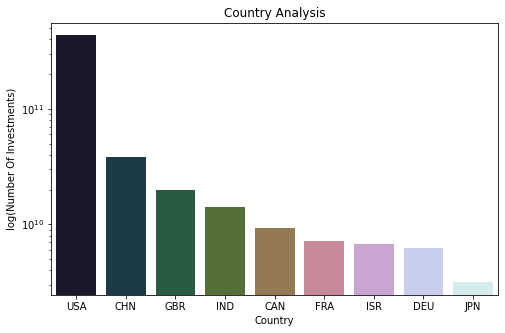

In [73]:
plt.figure(figsize = [8,5])
sns.barplot(data = top9, x = 'country_code', y = 'raised_amount_usd',palette = 'cubehelix')
plt.yscale('log')
sns.color_palette("Paired")
plt.xlabel("Country")
plt.ylabel('log(Number Of Investments)')
plt.title('Country Analysis')
plt.savefig('Country Analysis')
plt.show()

In [74]:
#plots for sector analysis
D1_Pivot = pd.pivot_table(data = D1, index = 'main_sector', values = 'raised_amount_usd', aggfunc = 'count').sort_values(by = 'raised_amount_usd')
D1_Pivot = D1_Pivot.reset_index(drop = False)

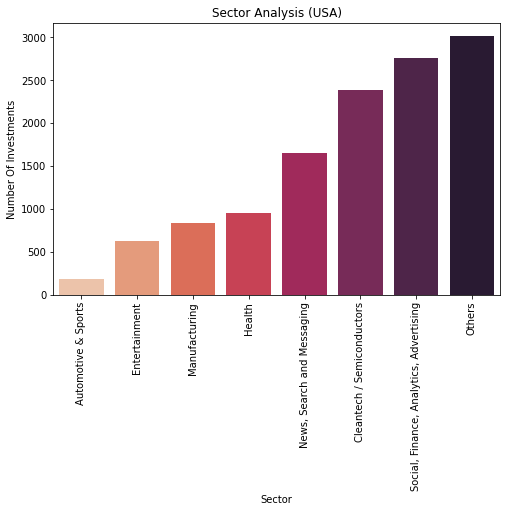

In [75]:
plt.figure(figsize = [8,5])
sns.barplot(data = D1_Pivot, x = 'main_sector' , y = 'raised_amount_usd',palette = 'rocket_r')
sns.color_palette("Paired")
plt.xlabel("Sector")
plt.ylabel('Number Of Investments')
plt.title('Sector Analysis (USA)')
plt.xticks(rotation = 90)
plt.savefig('Sector Analysis (USA)',bbox_inches='tight')
plt.show()

In [76]:
#plots for sector analysis
D2_Pivot = pd.pivot_table(data = D2, index = 'main_sector', values = 'raised_amount_usd', aggfunc = 'count').sort_values(by = 'raised_amount_usd')
D2_Pivot = D2_Pivot.reset_index(drop = False)

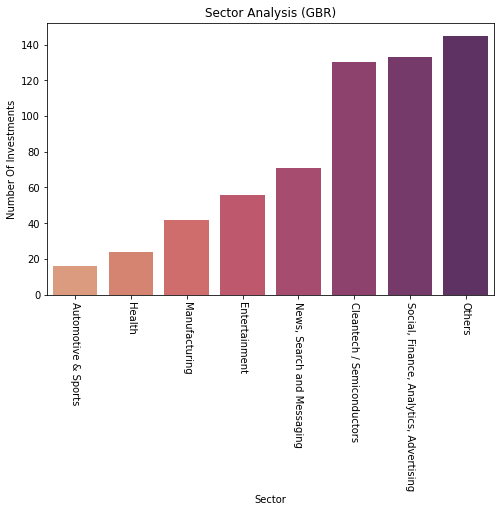

In [77]:
plt.figure(figsize = [8,5])
sns.barplot(data = D2_Pivot, x = 'main_sector' , y = 'raised_amount_usd',palette = 'flare')
plt.xlabel("Sector")
plt.ylabel('Number Of Investments')
plt.title('Sector Analysis (GBR)')
plt.xticks(rotation = 270)
plt.savefig('Sector Analysis (GBR)',bbox_inches='tight')
plt.show()

In [78]:
#plots for sector analysis
D3_Pivot = pd.pivot_table(data = D3, index = 'main_sector', values = 'raised_amount_usd', aggfunc = 'count').sort_values(by = 'raised_amount_usd')
D3_Pivot = D3_Pivot.reset_index(drop = False)

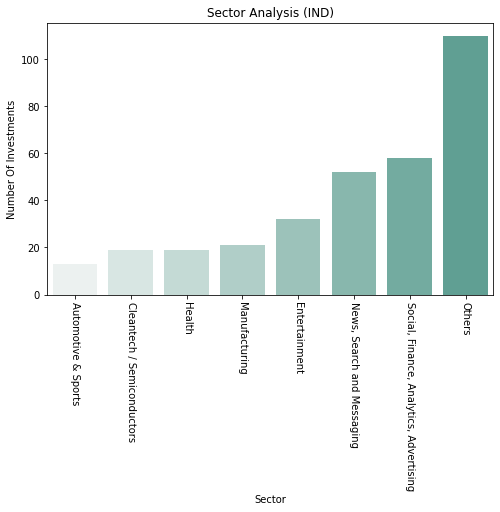

In [79]:
plt.figure(figsize = [8,5])
sns.barplot(data = D3_Pivot, x = 'main_sector' , y = 'raised_amount_usd', palette = 'light:#5A9')
plt.xlabel("Sector")
plt.ylabel('Number Of Investments')
plt.title('Sector Analysis (IND)')
plt.xticks(rotation = 270)
plt.savefig('Sector Analysis (IND)',bbox_inches='tight')
plt.show()

## Results

1. Type of investment suitable for Spark funds - Venture
2. Top Three countries to invest - United States of America, United Kingdom , India.
3. Top Three sectors - Others , Social, Finance, Analytics, Advertising , Cleantech / Semiconductors